Link to GitHub repository [here](https://github.com/jesp9435/ComSocSci)

Group member contributions: Both group members contributed equally to the parts of the assignment. We have worked collaboratively on all parts. 

# Part 1: Properties of the real-world network of Computational Social Scientists

In [62]:
# Relevant imports:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import networkx as nx
import netwulf as nw
import numpy as np
import pickle

In [63]:
# These numbers were found in Assignment 1
amount_of_nodes = 14196
amount_of_edges = 54304

# We use equation 3.2 from the book and solve for p:
probability = amount_of_edges/((amount_of_nodes*(amount_of_nodes-1))/2)
print("Probability: " + str(probability))

# The average degree can be found from equation 3.3:
k = probability*(amount_of_nodes-1.0)
print("Average degree: " + str(k))

# Generating a Random Network with node count mirroring Computational Social Scientists network
# using our calculated probability:
RG = nx.gnp_random_graph(amount_of_nodes, probability, seed=1000, directed=False)
#nw.interactive.visualize(RG)

Probability: 0.0005389648330011947
Average degree: 7.650605804451958


Answer the following questions (max 200 words in total):

What regime does your random network fall into? Is it above or below the critical threshold?
According to the textbook, what does the network's structure resemble in this regime?
Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.

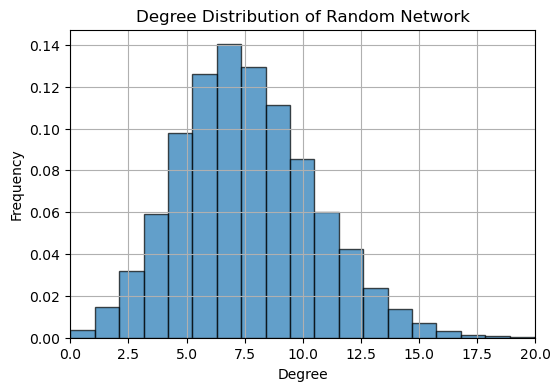

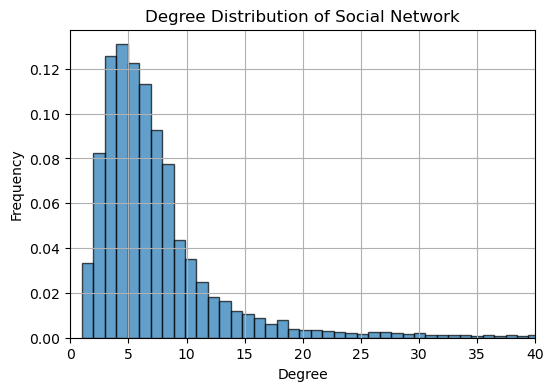

In [64]:
# Computing distribution of degree for the random network:
degrees_random = [degree for node, degree in RG.degree()]
hist, bins = np.histogram(degrees_random, bins=20, density=True)

# Plot the degree distribution
plt.figure(figsize=(6, 4))
plt.hist(degrees_random, bins=bins, density=True, alpha=0.7, edgecolor = "black")
plt.xlabel('Degree')
plt.xlim(0,20)
plt.ylabel('Frequency')
plt.title('Degree Distribution of Random Network')
plt.grid(True)
plt.show()

# Accessing the network from Assignment 1:
with open("my_network.pickle", "rb") as f:
    G = pickle.load(f)

# Computing distribution of degree for the Social network:
degrees_social = [degree for node, degree in G.degree()]
hist, bins = np.histogram(degrees_social, bins=200, density=False)

# Plot the degree distribution
plt.figure(figsize=(6, 4))
plt.hist(degrees_social, bins=bins, density=True, alpha=0.7, edgecolor = "black")
plt.xlabel('Degree')
plt.xlim(0,40)
plt.ylabel('Frequency')
plt.title('Degree Distribution of Social Network')
plt.grid(True)
plt.show()




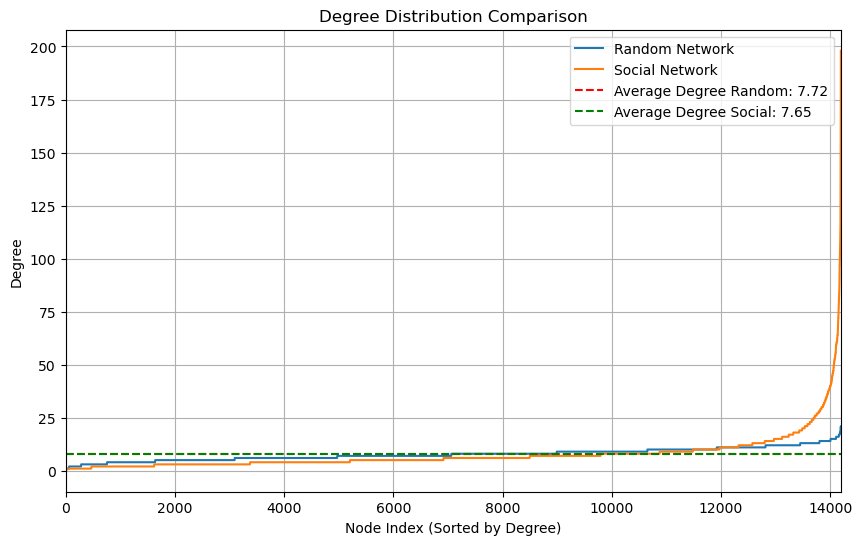

In [70]:
# Compute average degree for random and social networks
avg_degree_random = np.mean(degrees_random)
avg_degree_social = np.mean(degrees_social)

# Plot both degree distributions
plt.figure(figsize=(10, 6))
plt.plot(sorted(degrees_random), label='Random Network')
plt.plot(sorted(degrees_social), label='Social Network')
plt.xlabel('Node Index (Sorted by Degree)')
plt.ylabel('Degree')
plt.title('Degree Distribution Comparison')
plt.grid(True)
plt.legend()

# Add vertical lines for average degrees
plt.axhline(y=avg_degree_random, color='r', linestyle='--', label=f'Average Degree Random: {avg_degree_random:.2f}')
plt.axhline(y=avg_degree_social, color='g', linestyle='--', label=f'Average Degree Social: {avg_degree_social:.2f}')

plt.xlim(0, len(degrees_random))  # Adjust x-axis limits

plt.legend()
plt.show()


# Part 2: Network Analysis in Computational Social Science

In [66]:
# Part 1: Assortativity Coefficient
# This function calculates the Assortativity Coefficient for the network based on the country of each node:
def assortativity_coefficient(G, attribute):
    m = G.number_of_edges()
    k = sum(dict(G.degree()).values())

    e_i = 0
    a_i = 0

    for u, v in G.edges():
        if G.nodes[u][attribute] == G.nodes[v][attribute]:
            e_i += G.degree[u] * G.degree[v]
        a_i += G.degree[u] + G.degree[v]

    r = (e_i / m - (0.5 * a_i / m)**2) / (0.5 * a_i / m - (0.5 * a_i / m)**2)
    return r

# Using the function to calculate the Assortativity Coefficient:
assortativity = assortativity_coefficient(G, 'country_code')
print("Assortativity coefficient based on country attribute:", assortativity)


Assortativity coefficient based on country attribute: 0.6630008894313671


In [75]:
# Part 2: Configuration model
import random
import copy

def double_edge_swap(original_network, num_swaps=10):
    # Step 1: Create an exact copy of the original network
    randomized_network = copy.deepcopy(original_network)
    
    # Step 2: Perform edge swaps while retaining the degree sequence
    total_edges = original_network.number_of_edges()
    for _ in range(num_swaps * total_edges):  # Perform E*10 swaps
        # Select two random edges
        print(_+1, "/", num_swaps*total_edges)
        e1, e2 = random.sample(list(randomized_network.edges()), 2)
        u, v = e1
        x, y = e2
        
        # Ensure u != y and v != x
        if u == y or v == x:
            continue
        
        # Flip the direction of e1 to e1=(v,u) 50% of the time
        if random.random() < 0.5:
            e1 = (v, u)
        
        # Ensure that new edges e'1 and e'2 do not already exist in the network
        e1_prime = (e1[0], e2[1])
        e2_prime = (e2[0], e1[1])
        if e1_prime in randomized_network.edges() or e2_prime in randomized_network.edges():
            continue
        
        # Remove edges e1 and e2 and add edges e'1 and e'2
        randomized_network.remove_edges_from([e1, e2])
        randomized_network.add_edges_from([e1_prime, e2_prime])
    
    return randomized_network

original_network = G

# Call the double_edge_swap function with the original network
randomized_network = double_edge_swap(original_network)

# Verify that the algorithm works by checking the degree sequence
original_degrees = sorted([d for n, d in original_network.degree()])
randomized_degrees = sorted([d for n, d in randomized_network.degree()])
assert original_degrees == randomized_degrees, "Degree sequence mismatch between original and randomized networks"



1 / 543040
2 / 543040
3 / 543040
4 / 543040
5 / 543040
6 / 543040
7 / 543040
8 / 543040
9 / 543040
10 / 543040
11 / 543040
12 / 543040
13 / 543040
14 / 543040
15 / 543040
16 / 543040
17 / 543040
18 / 543040
19 / 543040
20 / 543040
21 / 543040
22 / 543040
23 / 543040
24 / 543040
25 / 543040
26 / 543040
27 / 543040
28 / 543040
29 / 543040
30 / 543040
31 / 543040
32 / 543040
33 / 543040
34 / 543040
35 / 543040
36 / 543040
37 / 543040
38 / 543040
39 / 543040
40 / 543040
41 / 543040
42 / 543040
43 / 543040
44 / 543040
45 / 543040
46 / 543040
47 / 543040
48 / 543040
49 / 543040
50 / 543040
51 / 543040
52 / 543040
53 / 543040
54 / 543040
55 / 543040
56 / 543040
57 / 543040
58 / 543040
59 / 543040
60 / 543040
61 / 543040
62 / 543040
63 / 543040
64 / 543040
65 / 543040
66 / 543040
67 / 543040
68 / 543040
69 / 543040
70 / 543040
71 / 543040
72 / 543040
73 / 543040
74 / 543040
75 / 543040
76 / 543040
77 / 543040
78 / 543040
79 / 543040
80 / 543040
81 / 543040
82 / 543040
83 / 543040
84 / 543040
8

# Part 3: Words that characterize Computational Social Science communities

##### Exercise 1: TF-IDF and the Computational Social Science communities

* TF-IDF is a statistical measure used in natural language processing and information retrieval to evaluate the importance of a word in a document within a larger collection of documents. The main purpose of TF-IDF is to highlight words that are significant to a specific document while downplaying words that are common across many documents.
* TF stands for Term Frequency and is simply, as the name suggests, a calculation of the frequency of a term in a specific document. 
* IDF stands for Inverse Document Frequency and is a measure of a terms's rarity across all documents in the collection.